In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [199]:
df = pd.read_csv('train_data.csv');
df.head()

,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,8,c,3,Z,3,radiotherapy,R,F,2.0,31397,7.0,Emergency,Extreme,2,51-60,4911.0,0-10
1,2,2,c,5,Z,2,radiotherapy,S,F,2.0,31397,7.0,Trauma,Extreme,2,51-60,5954.0,41-50
2,3,10,e,1,X,2,anesthesia,S,E,2.0,31397,7.0,Trauma,Extreme,2,51-60,4745.0,31-40
3,4,26,b,2,Y,2,radiotherapy,R,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,7272.0,41-50
4,5,26,b,2,Y,2,radiotherapy,S,D,2.0,31397,7.0,Trauma,Extreme,2,51-60,5558.0,41-50


In [203]:
df.Stay.unique() # unique target classes

array(['0-10', '41-50', '31-40', '11-20', '51-60', '21-30', '71-80',
       'More than 100 Days', '81-90', '61-70', '91-100'], dtype=object)

# Target class reduction 

The choice of definying stays < 50 days as "short" and > 50 "long" was thought to be reasonable given the ultimate goal of the project that was to compare two ML algorythms. 

In [201]:
# the following lines convert the 11 target classes into 2 ('Short' / 'Long')
df.loc[df.Stay == '0-10', 'Stay'] = 'Short'
df.loc[df.Stay == '11-20', 'Stay'] = 'Short'
df.loc[df.Stay == '21-30', 'Stay'] = 'Short'
df.loc[df.Stay == '31-40', 'Stay'] = 'Short'
df.loc[df.Stay == '41-50', 'Stay'] = 'Short'
df.loc[df.Stay == '51-60', 'Stay'] = 'Long'
df.loc[df.Stay == '61-70', 'Stay'] = 'Long'
df.loc[df.Stay == '71-80', 'Stay'] = 'Long'
df.loc[df.Stay == '81-90', 'Stay'] = 'Long'
df.loc[df.Stay == '91-100', 'Stay'] = 'Long'
df.loc[df.Stay == 'More than 100 Days', 'Stay'] = 'Long'

In [ ]:
# df.to_csv('ML_dataset.csv')   -- commented out to avoid repeated savings of this file 

# Data Exploration

In [273]:
df = pd.read_csv('ML_dataset.csv')
print(df.shape)
df.head()

(318438, 18)


,case_id,Hospital_code,Hospital_type_code,City_Code_Hospital,Hospital_region_code,Available Extra Rooms in Hospital,Department,Ward_Type,Ward_Facility_Code,Bed Grade,patientid,City_Code_Patient,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,130,2,c,5,Z,3,gynecology,S,F,2.0,74756,5.0,Emergency,Extreme,2,11-20,4371,Short
1,131,2,c,5,Z,3,gynecology,S,F,2.0,74756,5.0,Emergency,Extreme,2,11-20,9423,Short
2,132,11,b,2,Y,4,gynecology,Q,D,2.0,74756,5.0,Emergency,Extreme,4,11-20,3715,Short
3,133,13,a,5,Z,1,gynecology,R,F,2.0,74756,5.0,Trauma,Extreme,1,11-20,4819,Short
4,134,28,b,11,X,3,anesthesia,R,F,3.0,74756,5.0,Trauma,Extreme,2,11-20,4710,Short


In [274]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 18 columns):
 #   Column                             Non-Null Count   Dtype  
---  ------                             --------------   -----  
 0   case_id                            318438 non-null  int64  
 1   Hospital_code                      318438 non-null  int64  
 2   Hospital_type_code                 318438 non-null  object 
 3   City_Code_Hospital                 318438 non-null  int64  
 4   Hospital_region_code               318438 non-null  object 
 5   Available Extra Rooms in Hospital  318438 non-null  int64  
 6   Department                         318438 non-null  object 
 7   Ward_Type                          318438 non-null  object 
 8   Ward_Facility_Code                 318438 non-null  object 
 9   Bed Grade                          318325 non-null  float64
 10  patientid                          318438 non-null  int64  
 11  City_Code_Patient                  3139

## NaN

In [275]:
df.isnull().sum() # total NaNs for column

case_id                                 0
Hospital_code                           0
Hospital_type_code                      0
City_Code_Hospital                      0
Hospital_region_code                    0
Available Extra Rooms in Hospital       0
Department                              0
Ward_Type                               0
Ward_Facility_Code                      0
Bed Grade                             113
patientid                               0
City_Code_Patient                    4532
Type of Admission                       0
Severity of Illness                     0
Visitors with Patient                   0
Age                                     0
Admission_Deposit                       0
Stay                                    0
dtype: int64

## Numeric Variables

In [276]:
df_num = df.select_dtypes(np.number) # selects numerical variables

for col in df_num.columns: # plot a quick summary of number of unique valus per column
    print('-' * 10 + col + '-' * 10)
    print("Number of unique values = {}". format(df_num[col].nunique()))
    print(df_num[col].value_counts().head(3))

----------case_id----------
Number of unique values = 318438
130       1
133845    1
133870    1
Name: case_id, dtype: int64
----------Hospital_code----------
Number of unique values = 32
26    33076
23    26566
19    21219
Name: Hospital_code, dtype: int64
----------City_Code_Hospital----------
Number of unique values = 11
1    55351
2    51809
6    46991
Name: City_Code_Hospital, dtype: int64
----------Available Extra Rooms in Hospital----------
Number of unique values = 18
2    98311
4    91709
3    91520
Name: Available Extra Rooms in Hospital, dtype: int64
----------Bed Grade----------
Number of unique values = 4
2.0    123671
3.0    110583
4.0     57566
Name: Bed Grade, dtype: int64
----------patientid----------
Number of unique values = 92017
66714    50
91292    43
38525    39
Name: patientid, dtype: int64
----------City_Code_Patient----------
Number of unique values = 37
8.0    124011
2.0     38869
1.0     26377
Name: City_Code_Patient, dtype: int64
----------Visitors with Pat

In [277]:
df = df.drop(columns = ['case_id', 'patientid']) # dropping non-informative features

### Plotting numerical variables

Most of this numerical variables could have been treated as categorical. We converted their type further in the work. 

In [278]:
df_num_toplot = df_num.loc[:, ['Hospital_code', 'City_Code_Hospital', # most of our numerical columns can be treated as categorical. 
       'Available Extra Rooms in Hospital', 'Bed Grade',
       'City_Code_Patient', 'Visitors with Patient']]

col_num = np.reshape(df_num_toplot.columns, (2,3)) # reshape columns for easier plotting

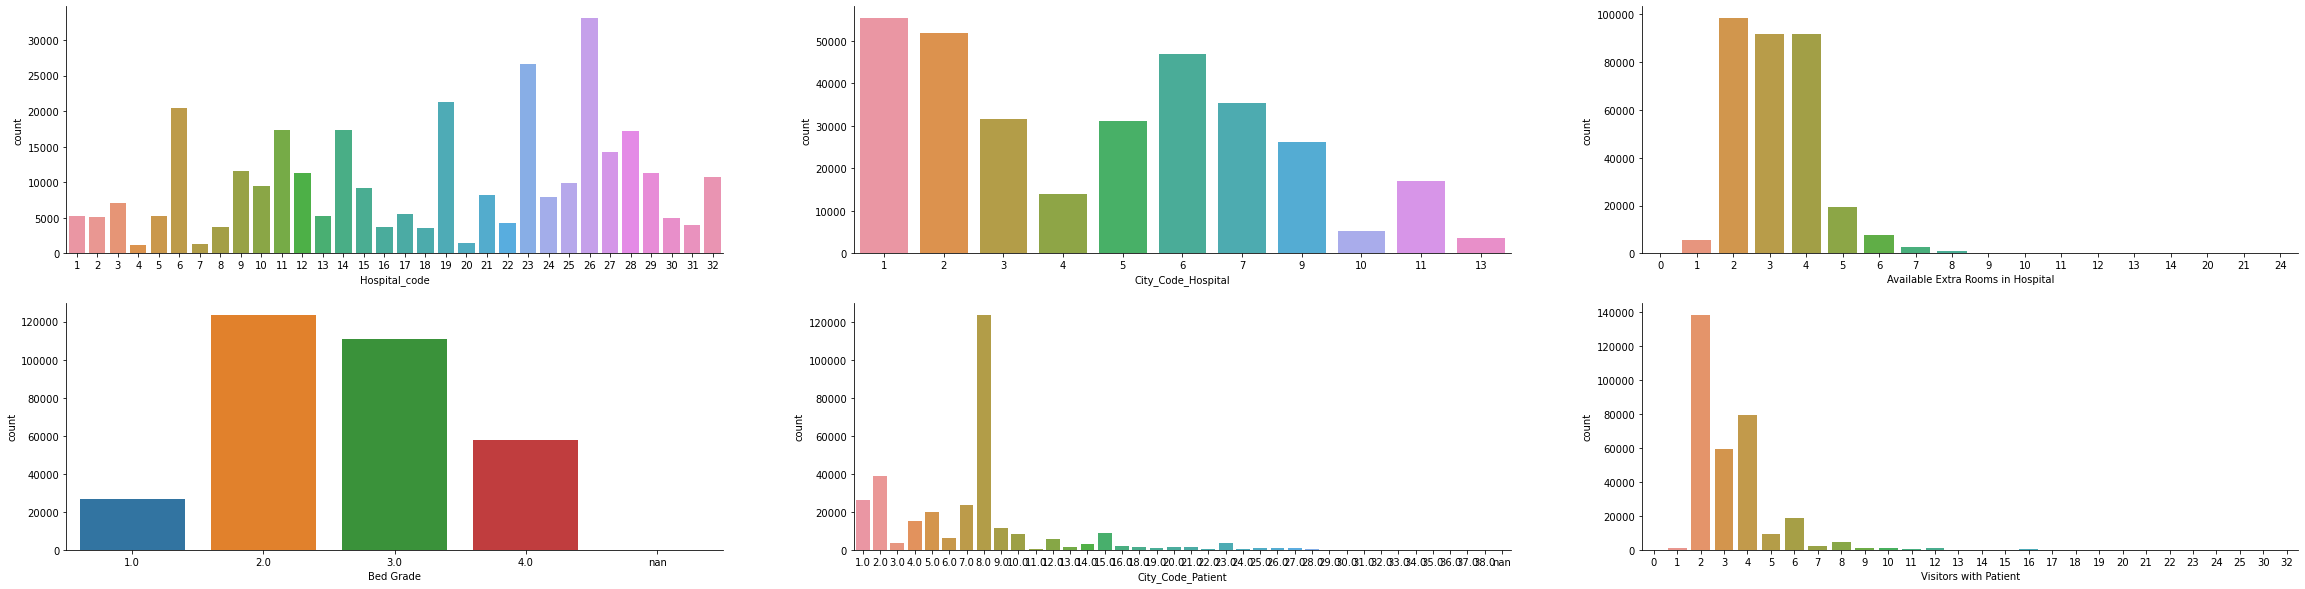

In [289]:
fig, ax = plt.subplots(2, 3, figsize = (40,10)); # plot all the numerical variables that can be treated as categories
for i in np.arange(2):
    for x in np.arange(3):
        sns.countplot(x = df_num_toplot[col_num[i][x]], order = df_num_toplot[col_num[i][x]].sort_values(ascending = True).unique(), ax = ax[i][x])
        sns.despine()

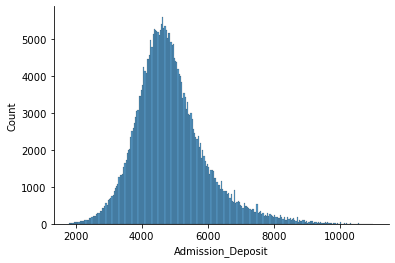

In [280]:
sns.histplot(df_num['Admission_Deposit']); # this is a continuous numerical that we plot separately. 
sns.despine()

## Categorical Variables

In [281]:
df_cat = df.select_dtypes('object') # categorical data frame 

In [282]:
for col in df_cat.columns: # plot a quick summary of number of unique valus per column
    print('-' * 10 + col + '-' * 10)
    print("Numeber of unique values = {}". format(df_cat[col].nunique()))
    print(df_cat[col].value_counts().head(3))

----------Hospital_type_code----------
Numeber of unique values = 7
a    143425
b     68946
c     45928
Name: Hospital_type_code, dtype: int64
----------Hospital_region_code----------
Numeber of unique values = 3
X    133336
Y    122428
Z     62674
Name: Hospital_region_code, dtype: int64
----------Department----------
Numeber of unique values = 5
gynecology      249486
anesthesia       29649
radiotherapy     28516
Name: Department, dtype: int64
----------Ward_Type----------
Numeber of unique values = 6
R    127947
Q    106165
S     77794
Name: Ward_Type, dtype: int64
----------Ward_Facility_Code----------
Numeber of unique values = 6
F    112753
E     55351
D     51809
Name: Ward_Facility_Code, dtype: int64
----------Type of Admission----------
Numeber of unique values = 3
Trauma       152261
Emergency    117676
Urgent        48501
Name: Type of Admission, dtype: int64
----------Severity of Illness----------
Numeber of unique values = 3
Moderate    175843
Minor        85872
Extreme   

### Plotting categorical variables

In [283]:
col_cat = np.reshape(df_cat.columns, (3,3)) # reshape columns for easier plotting

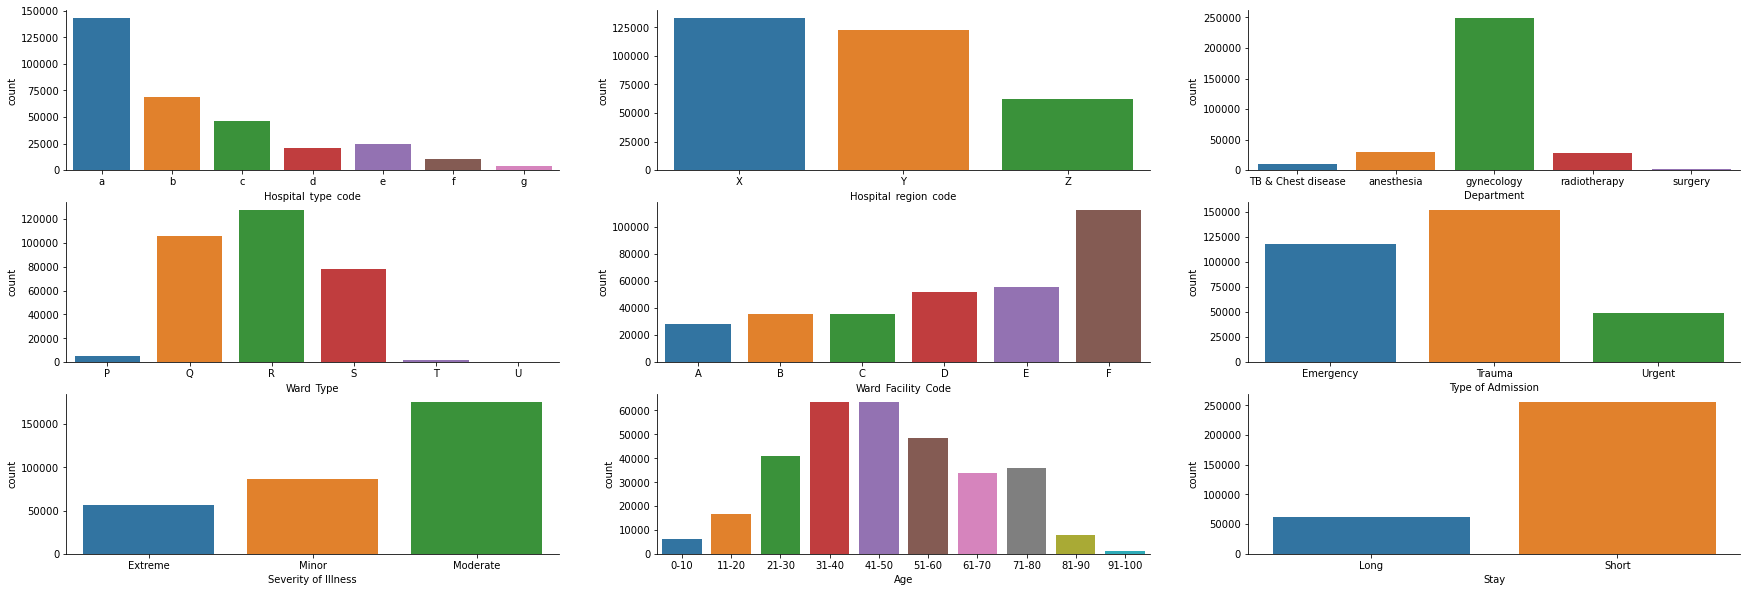

In [290]:
fig, ax = plt.subplots(3, 3, figsize = (30,10)); # plot all the categorical variables
for i in np.arange(3):
    for x in np.arange(3):
        sns.countplot(x = df_cat[col_cat[i][x]],order = df_cat[col_cat[i][x]].sort_values(ascending = True).unique(), ax = ax[i][x])
        sns.despine()

### Assigning right data type to the variables
As we previously saw, most of our numerical variables should actually be treated as categories. We transformed them below. 

In [291]:
# assigning different data types to the features
df['Hospital_code'] = df['Hospital_code'].astype( 'object' )   
df['Bed Grade'] = df['Bed Grade'].astype('object' )
df['City_Code_Patient'] = df['City_Code_Patient'].astype('object' )                            
df['City_Code_Hospital'] = df['City_Code_Hospital'].astype('object');

In [292]:
df.info() # most of our variables are categorical 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 318438 entries, 0 to 318437
Data columns (total 16 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Hospital_code                      318438 non-null  object
 1   Hospital_type_code                 318438 non-null  object
 2   City_Code_Hospital                 318438 non-null  object
 3   Hospital_region_code               318438 non-null  object
 4   Available Extra Rooms in Hospital  318438 non-null  int64 
 5   Department                         318438 non-null  object
 6   Ward_Type                          318438 non-null  object
 7   Ward_Facility_Code                 318438 non-null  object
 8   Bed Grade                          318325 non-null  object
 9   City_Code_Patient                  313906 non-null  object
 10  Type of Admission                  318438 non-null  object
 11  Severity of Illness                318438 non-null  

# Correlations 

### Correlation Matrix

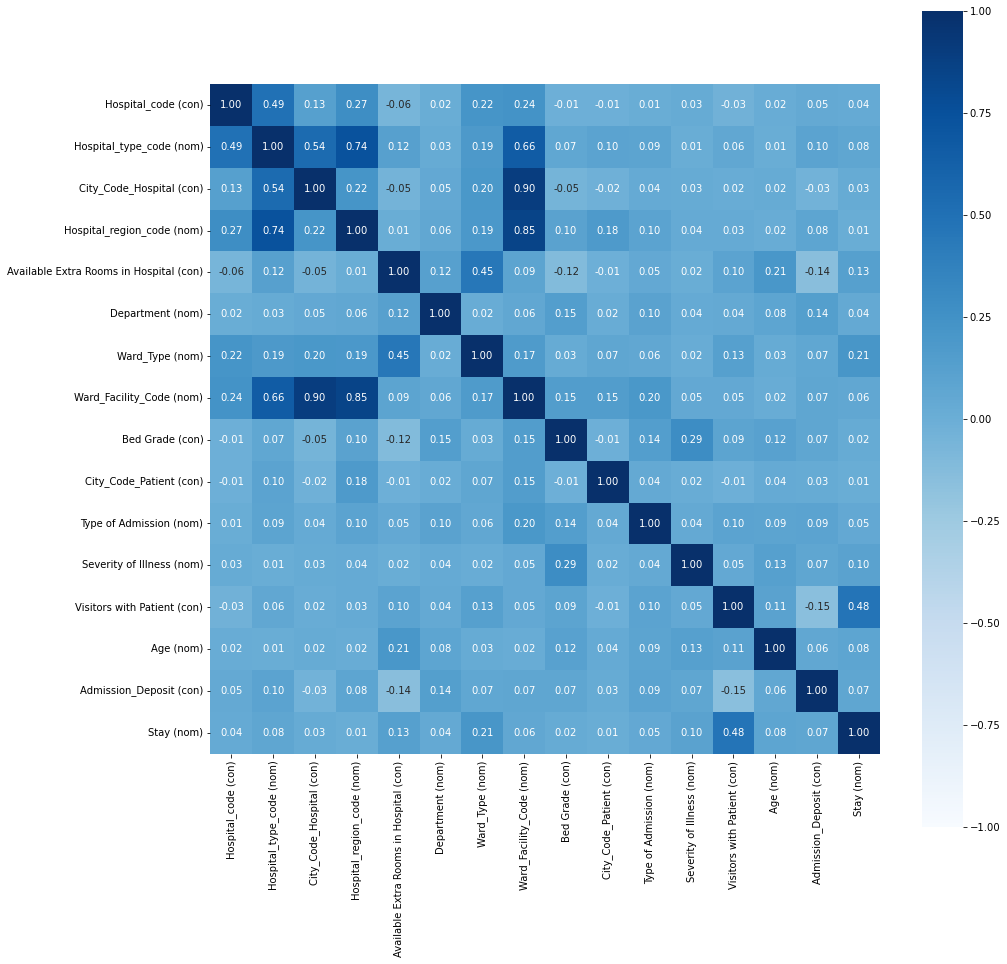

In [287]:
from dython.nominal import associations
#module taken from https://github.com/shakedzy/dython
#functions used in this module can be found here: https://github.com/shakedzy/dython/blob/master/dython/nominal.py
#source: https://towardsdatascience.com/the-search-for-categorical-correlation-a1cf7f1888c9

associations(df, mark_columns = True, cmap = "Blues", figsize = (15,15)); # this function uses Pearson's R between continuous variables, Correlation ratio for categorical-continuous and Cramer's V for categorical-categorical.

### Multicollinearity

In [293]:
df = df.drop(columns = ['Hospital_region_code', 'City_Code_Hospital', 'Hospital_code', 'Ward_Facility_Code']) # drops features mutually dependent. We left one feature each for "hospital" and "ward" in the frame, based on their correlation with our target variable.  

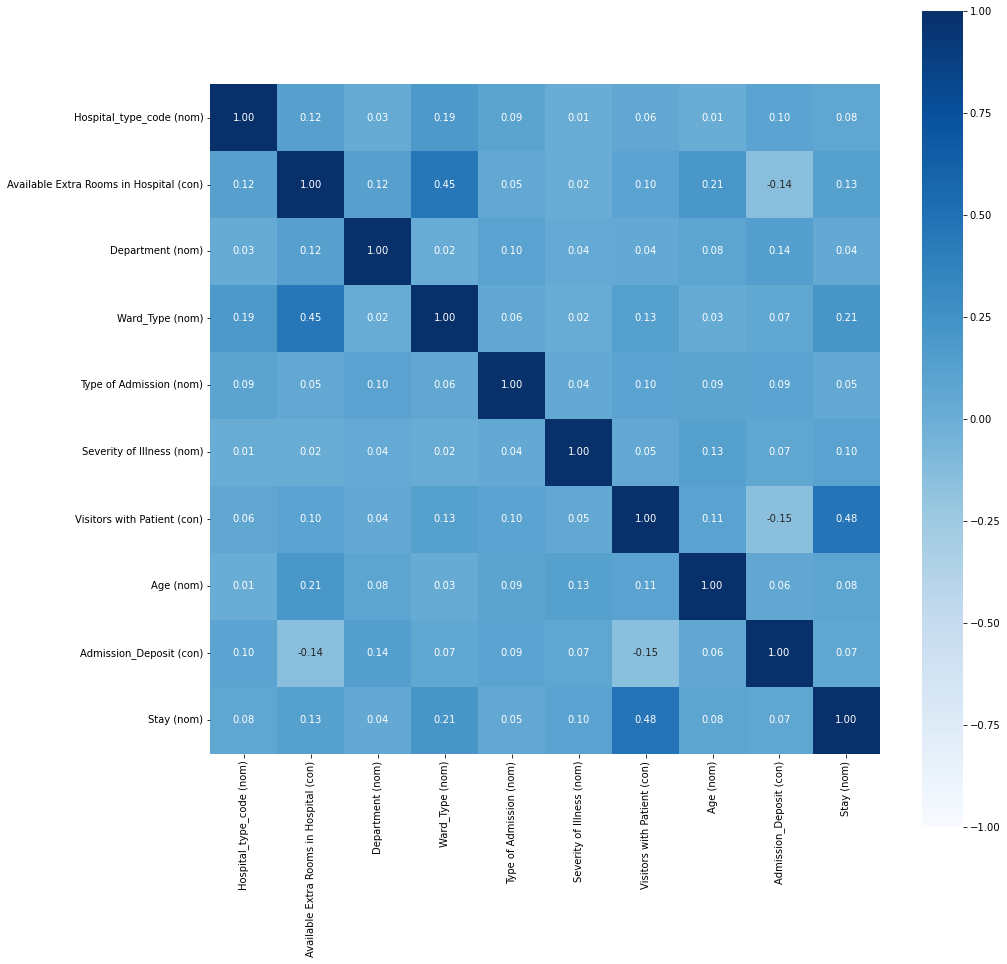

In [178]:
associations(df, mark_columns = True, cmap = "Blues", figsize = (15,15));

# SMOTENC

Our target variable was strongly unbalanced and a balanced target variable in our training test will likely lead to better results when we will train our algorithms so we decided to use a Synthetic Minority Over-sampling Technique (SMOTENC) to oversample the "long Stay" class. 

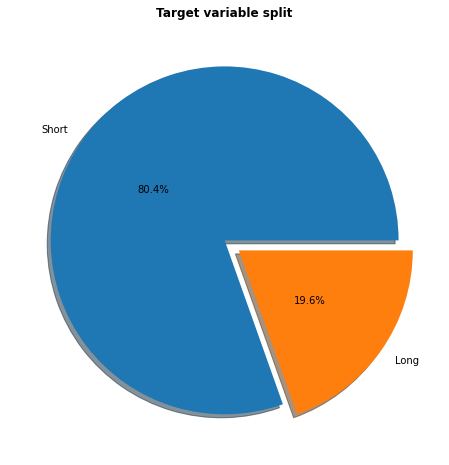

In [294]:
# create the percentages 
short = df.loc[df.Stay == 'Short'].shape[0]
total = len(df.Stay)
short_percent = short/total 
long_percent = 1 - short_percent
labels = ['Short', 'Long']
sizes = [short_percent, long_percent];

#plot the target variable 
fig, ax = plt.subplots(figsize = (8,8))
plt.pie(sizes, autopct="%.1f%%", explode = (0, 0.1), labels=labels, pctdistance=0.5, shadow = True);
plt.title('Target variable split', fontweight = 'bold');

## Splitting the dataset in train and test

In [295]:
df = df.drop(columns = ['Bed Grade', 'City_Code_Patient']) # drops these two columns since are very weakly correlated to our target variable and have NaNs that would interfere with our oversampling technique

In [296]:
from sklearn.model_selection import train_test_split
X = df.iloc[:, 0:-1]; # takes all the features but the target variable
y = df.iloc[:, -1]; # selects only the target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify = y, test_size = 0.2, random_state=0) # creates the traing and test sets

print('X_train shape = {}'.format(X_train.shape)) # plot the splits 
print('y_train shape = {}'.format(y_train.shape))
print('X_test shape = {}'.format(X_test.shape))
print('y_test shape = {}'.format(y_test.shape))

X_train shape = (254750, 9)
y_train shape = (254750,)
X_test shape = (63688, 9)
y_test shape = (63688,)


In [297]:
y_test.value_counts() # in our test set we will still have an unbalanced labels ratio, but that's okay. 

Short    51228
Long     12460
Name: Stay, dtype: int64

In [298]:
from imblearn.over_sampling import SMOTENC
X_train_cat = X_train.select_dtypes('object') # in our case we have to handle the categorical variables.
smotenc = SMOTENC(categorical_features= [X_train.dtypes==object], random_state=0) # creates the SMOTENC model.  
X_train_sm, y_train_sm = smotenc.fit_resample(X_train, y_train )

In [299]:
print('X_train_sm shape = {}'.format(X_train_sm.shape)) # check the shapes of the new oversampled data
print('y_train_sm shape = {}'.format(y_train_sm.shape))

X_train_sm shape = (409816, 9)
y_train_sm shape = (409816,)


In [300]:
X_train_sm['Stay'] = y_train_sm # joins oversampled target variable to X_train oversampled data frame 
print('Final train set shape = {}'.format(X_train_sm.shape))
X_test['Stay'] = y_test # joins the X and y test sets in one test data frame
print('Final test set shape = {}'.format(X_test.shape))

Final train set shape = (409816, 10)
Final test set shape = (63688, 10)


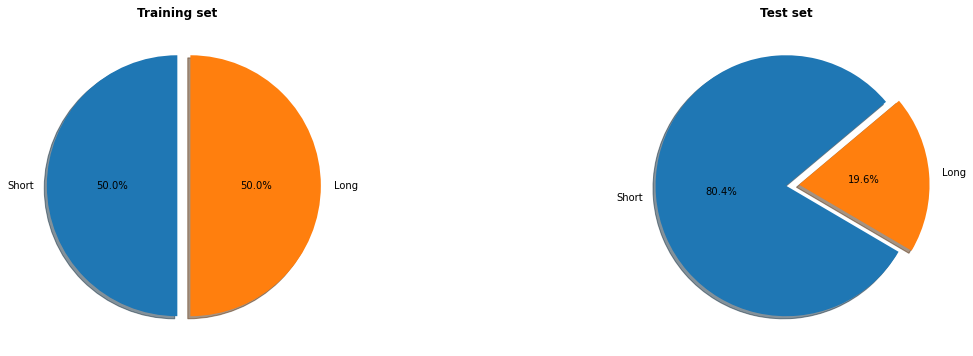

In [301]:
# plot the unbalanced test set labels 
short_t = X_test.loc[X_test.Stay == 'Short'].shape[0]
total_t = len(X_test.Stay)
short_percent_t = short_t/total_t 
long_percent_t = 1 - short_percent_t
sizes_t = [short_percent_t, long_percent_t];

# plot the balanced trainig set labels 
short = X_train_sm.loc[X_train_sm.Stay == 'Short'].shape[0]
total = len(X_train_sm.Stay)
short_percent = short/total 
long_percent = 1 - short_percent
sizes = [short_percent, long_percent];

labels = ['Short', 'Long'] # sets the labels 

fig, ax = plt.subplots(1, 2, figsize = (20,6))
ax[0].pie(sizes, autopct="%.1f%%", explode = (0, 0.1), labels=labels, pctdistance=0.5, shadow = True, startangle = 90);
ax[1].pie(sizes_t, autopct="%.1f%%", explode = (0, 0.1), labels=labels, pctdistance=0.5, shadow = True, startangle = 40);
ax[0].set_title("Training set", fontweight = 'bold');
ax[1].set_title("Test set", fontweight = 'bold');

# Exporting the dataframes

In [122]:
# names of the variables may be confusing, but X_train and X_test contain the y column as well. 
# X_train_sm.to_csv('train.csv') # exporting the train and test datasets -- commented out 
# X_test.to_csv('test.csv') 

# Futher analysis 

This was to check wether if we could spot some distinctive variables for each type of Stay (Long-Short) to try and "force" our MatLab algorithm to split on with the aim to solve some of the unbalancment in False Negatives and False positives. 

## Plotting Categorical Variables 
### Long Stay

In [302]:
df_long = df.loc[df.Stay == "Long"]

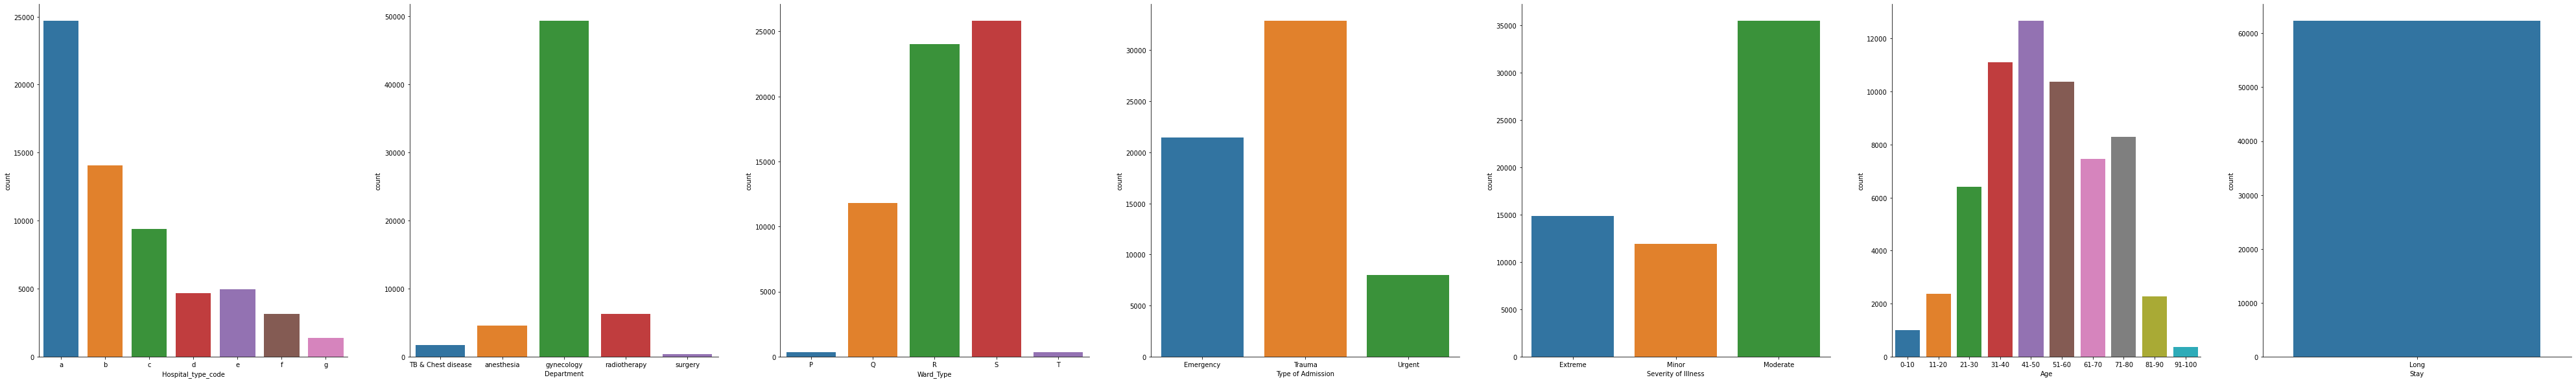

In [303]:
df_cat = df_long.select_dtypes('object') # categorical data frame 
fig, ax = plt.subplots(1, len(df_cat.columns), figsize = (70,10)); # plot all the categorical variables
for i in np.arange(len(df_cat.columns)):
        sns.countplot(x = df_cat[df_cat.columns[i]], order = df_cat[df_cat.columns[i]].sort_values(ascending = True).unique(),  ax = ax[i])
        sns.despine()

### Short Stay 

In [304]:
df_short = df.loc[df.Stay == "Short"]

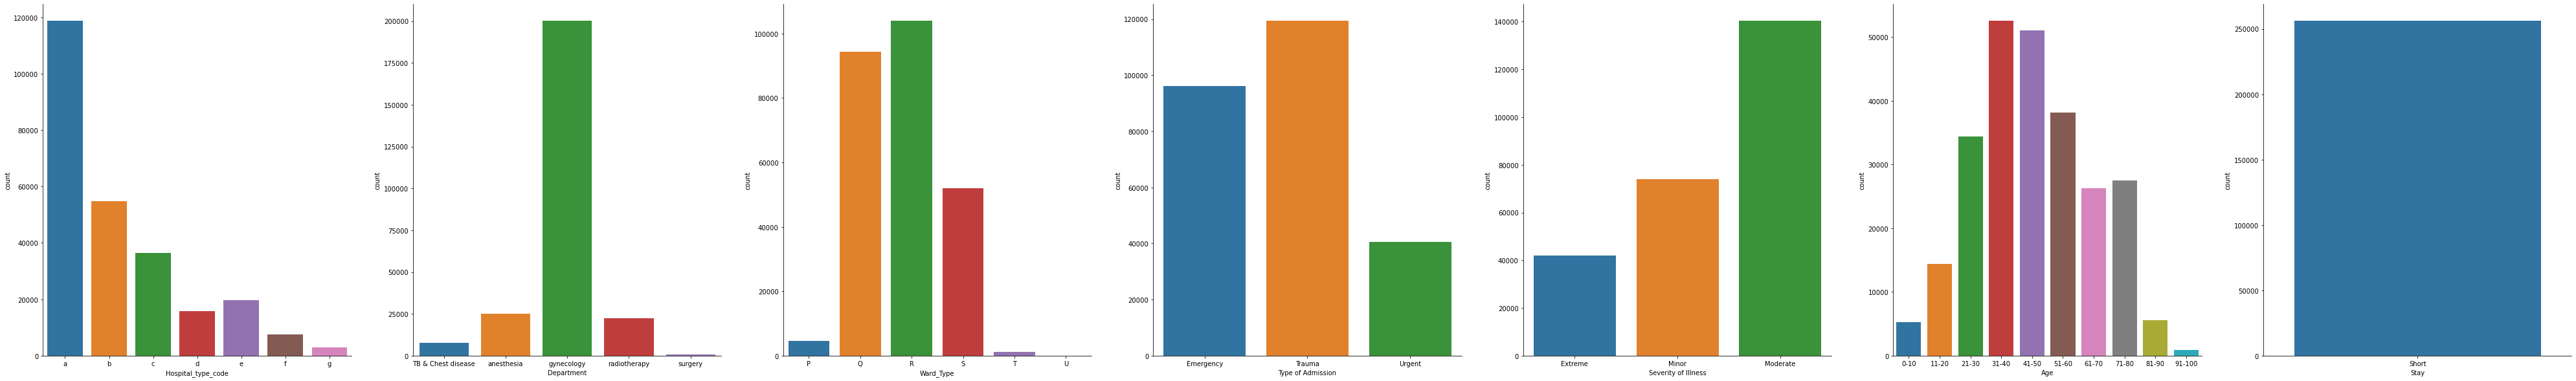

In [305]:
df_cat = df_short.select_dtypes('object') # categorical data frame 
fig, ax = plt.subplots(1, len(df_cat.columns), figsize = (70,10)); # plot all the categorical variables
for i in np.arange(len(df_cat.columns)):
        sns.countplot(x = df_cat[df_cat.columns[i]], order = df_cat[df_cat.columns[i]].sort_values(ascending = True).unique(), ax = ax[i])
        sns.despine()

WARNING - The above plots have different colors and order to the ones of the Long Stay and this may lead to mistakes in comparing them. In reality, unfortunately, the distributions are extremely similar and we were only able to see a significant difference in "Ward Type" that may have separeted the two "Stay" classes. This is what we also saw in the previous confusion matrix and in MatLab predictors. "Severity of ilness" could be another predictor. 

## Plotting Numerical Variables 
### Long Stay 

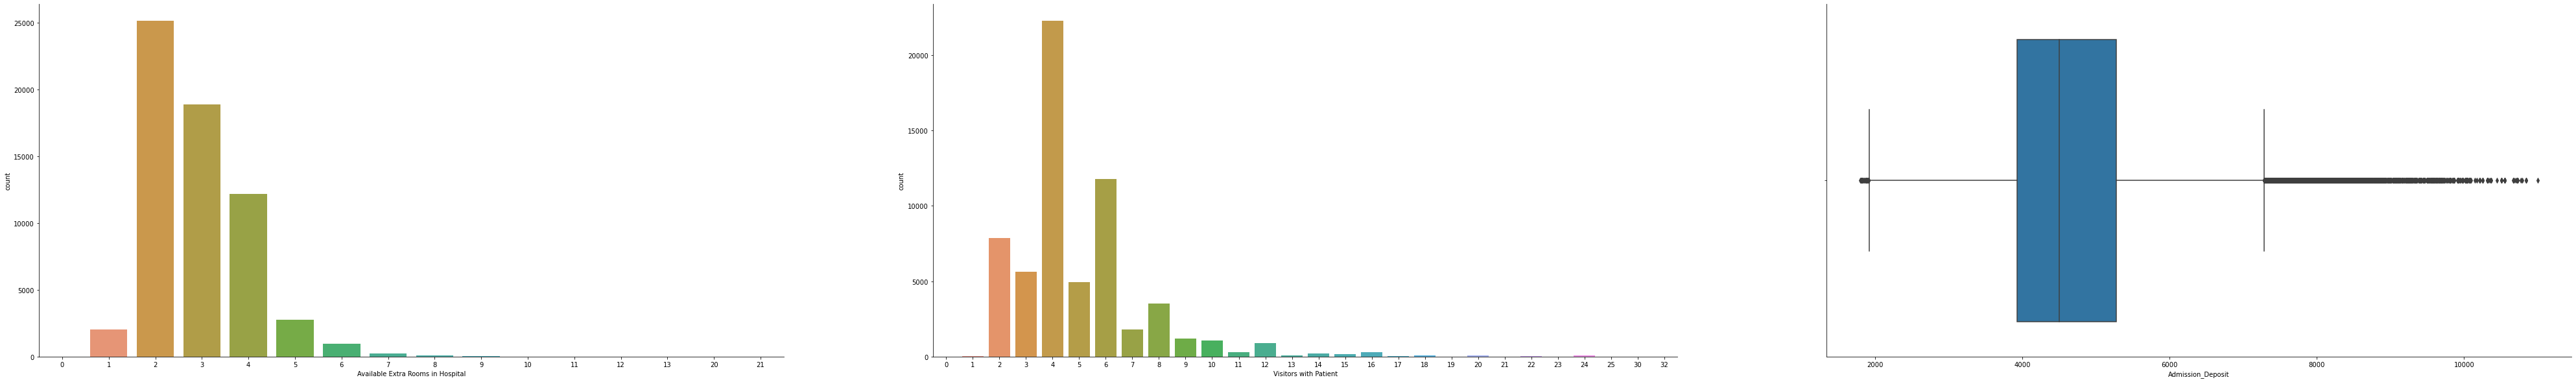

In [306]:
df_numl = df_long.select_dtypes(np.number) # categorical data frame  
fig, ax = plt.subplots(1, len(df_numl.columns), figsize = (70,10)); # plot all the categorical variables
for i in np.arange(len(df_numl.columns)):
    if i == 2:
        sns.boxplot(x = df_numl[df_numl.columns[i]],  ax = ax[i])
    else:
        sns.countplot(x = df_numl[df_numl.columns[i]],  ax = ax[i])
        sns.despine()

### Short Stay

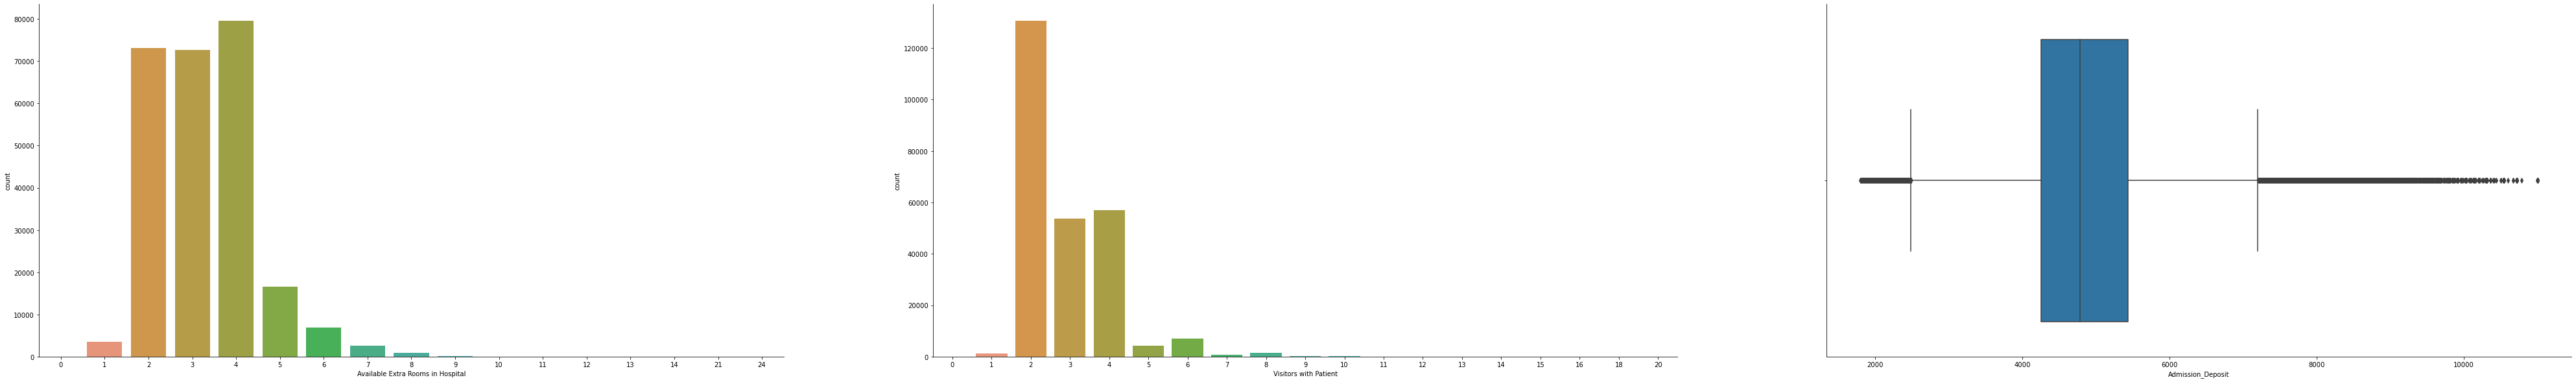

In [307]:
df_nums = df_short.select_dtypes(np.number) # categorical data frame  
fig, ax = plt.subplots(1, len(df_nums.columns), figsize = (70,10)); # plot all the categorical variables
for i in np.arange(len(df_nums.columns)):
    if i == 2:
        sns.boxplot(x = df_nums[df_numl.columns[i]],  ax = ax[i])
    else:
        sns.countplot(x = df_nums[df_numl.columns[i]],  ax = ax[i])
        sns.despine()

As for our previous confusion matrix and for MatLab predictors we see that "Available Extra" and "Visitors with patient"

# Feature Engineering 

In [308]:
print(X_train_sm.shape)
print(X_test.shape)

(409816, 10)
(63688, 10)


### Dropping non informative features

In [309]:
X_train_sm = X_train_sm.drop(columns = ['Hospital_type_code', 'Department', 'Type of Admission']);

### Labels encoding

In [310]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()  # labels encode the categorical features and leaves the numerical as such
for x in X_train_sm:
    if X_train_sm[x].dtypes == 'object':
        X_train_sm[x] = le.fit_transform(X_train_sm[x])

In [311]:
X_train_sm.head() # train set after labels encoding 

,Available Extra Rooms in Hospital,Ward_Type,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,5,0,0,3,5,4819,1
1,3,2,1,2,5,4278,1
2,1,1,0,4,5,3133,1
3,3,3,2,3,5,4203,0
4,3,1,2,3,7,4807,1


In [312]:
for x in X_test:
    if X_test[x].dtypes == 'object':  # labels encode the categorical features and leaves the numerical as such
        X_test[x] = le.fit_transform(X_test[x])

In [313]:
X_test.head() # test set before labels encoding 

,Hospital_type_code,Available Extra Rooms in Hospital,Department,Ward_Type,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
169824,2,4,2,2,2,0,2,4,3131,1
66890,0,2,1,2,1,2,2,3,6041,1
164408,0,4,2,1,0,2,2,4,3066,1
223393,3,4,2,2,0,1,3,5,4859,1
135039,0,3,2,2,1,0,4,4,4259,0


Short = 1 <br>
Long = 0

### Assigning the right labels to the target 

In [314]:
X_test['Stay'] = X_test['Stay'].apply(lambda x: 1 - x)  # in the encoding 0 was assigned to 'Long' and 1 to 'Short'. Here we swap the labels to follow the convention of 1 being assinged to the postive class

In [315]:
X_test.head() # test set after labels encoding 

,Hospital_type_code,Available Extra Rooms in Hospital,Department,Ward_Type,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
169824,2,4,2,2,2,0,2,4,3131,0
66890,0,2,1,2,1,2,2,3,6041,0
164408,0,4,2,1,0,2,2,4,3066,0
223393,3,4,2,2,0,1,3,5,4859,0
135039,0,3,2,2,1,0,4,4,4259,1


Short = 0 <br>
Long = 1

In [316]:
X_train_sm.head() # train set before labels encoding

,Available Extra Rooms in Hospital,Ward_Type,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,5,0,0,3,5,4819,1
1,3,2,1,2,5,4278,1
2,1,1,0,4,5,3133,1
3,3,3,2,3,5,4203,0
4,3,1,2,3,7,4807,1


In [317]:
X_train_sm['Stay'] = X_train_sm['Stay'].apply(lambda x: 1 - x)  # swaps the labels in the train set

In [318]:
X_train_sm.head() # train set after labels encoding

,Available Extra Rooms in Hospital,Ward_Type,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,5,0,0,3,5,4819,0
1,3,2,1,2,5,4278,0
2,1,1,0,4,5,3133,0
3,3,3,2,3,5,4203,1
4,3,1,2,3,7,4807,0


### Data type assignement

In [319]:
# below we assign the data types that seems to work best in tuning the algorythms 
X_train_sm['Ward_Type'] = X_train_sm['Ward_Type'].astype('object')
X_train_sm['Severity of Illness'] = X_train_sm['Severity of Illness'].astype('object')
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409816 entries, 0 to 409815
Data columns (total 7 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Available Extra Rooms in Hospital  409816 non-null  int64 
 1   Ward_Type                          409816 non-null  object
 2   Severity of Illness                409816 non-null  object
 3   Visitors with Patient              409816 non-null  int64 
 4   Age                                409816 non-null  int64 
 5   Admission_Deposit                  409816 non-null  int64 
 6   Stay                               409816 non-null  int64 
dtypes: int64(5), object(2)
memory usage: 21.9+ MB


### Scaling

In [28]:
# standard scaling the continuous feature
from sklearn.preprocessing import StandardScaler   
scaler = StandardScaler()
X_train_sm['Admission_Deposit'] = scaler.fit_transform(X_train_sm[['Admission_Deposit']]) # this continuous variable was much larger than the other ones.

In [29]:
X_train_sm.head()

,Hospital_type_code,Available Extra Rooms in Hospital,Department,Ward_Type,Type of Admission,Severity of Illness,Visitors with Patient,Age,Admission_Deposit,Stay
0,1,3,3,1,0,0,4,6,-0.190796,1
1,1,4,2,2,2,1,2,2,-0.323548,1
2,0,4,2,1,0,0,3,3,-1.099972,1
3,0,2,2,3,1,2,4,6,0.784755,0
4,1,3,3,2,0,2,3,0,0.631916,1


In [89]:
X_train_sm = X_train_sm.astype('object')

In [90]:
X_train_sm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 409816 entries, 0 to 409815
Data columns (total 10 columns):
 #   Column                             Non-Null Count   Dtype 
---  ------                             --------------   ----- 
 0   Hospital_type_code                 409816 non-null  object
 1   Available Extra Rooms in Hospital  409816 non-null  object
 2   Department                         409816 non-null  object
 3   Ward_Type                          409816 non-null  object
 4   Type of Admission                  409816 non-null  object
 5   Severity of Illness                409816 non-null  object
 6   Visitors with Patient              409816 non-null  object
 7   Age                                409816 non-null  object
 8   Admission_Deposit                  409816 non-null  object
 9   Stay                               409816 non-null  object
dtypes: object(10)
memory usage: 31.3+ MB


In [321]:
 X_train_sm.to_csv('train_eng_2.csv')   #-- commented out to repeated savings of our final dataframe  (Train set)

In [322]:
 X_test.to_csv('test_eng_2.csv')  #-- commented out to repeated savings of our final dataframe  (Test set)

# Plots

In this section we plotted some of the figures used in the poster

In [267]:
df[cols[2]].sort_values(ascending = True).unique()
np.linspace(df[cols[2]].value_counts().min(), df[cols[2]].value_counts().max(), 6)

array([ 1302. , 13791.4, 26280.8, 38770.2, 51259.6, 63749. ])

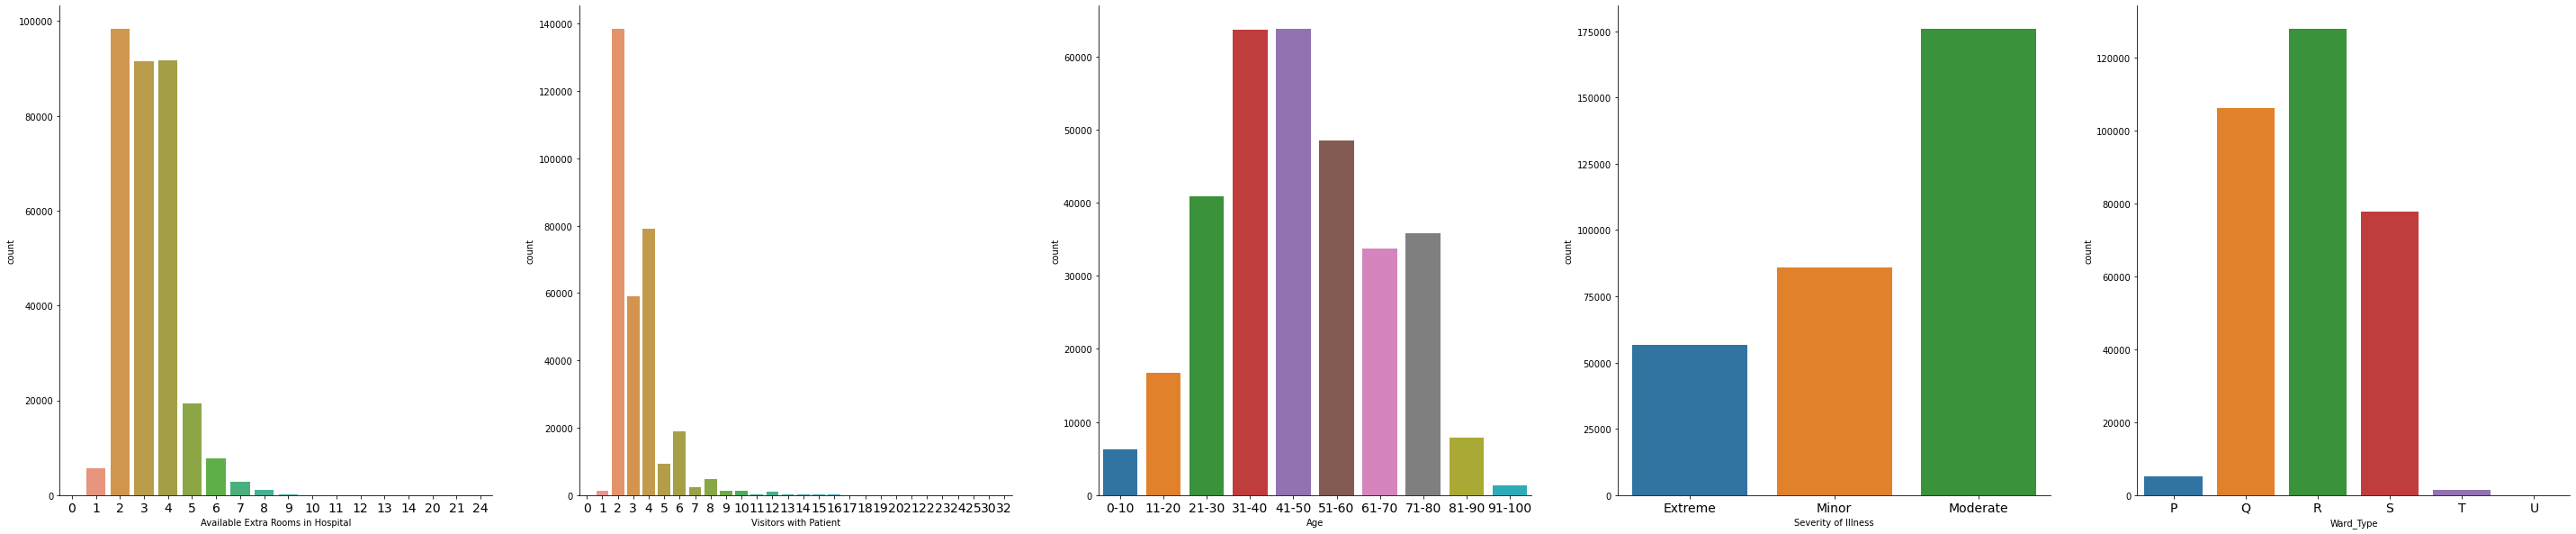

In [272]:
fig, ax = plt.subplots(1,5, figsize = (50, 10))
cols = ['Available Extra Rooms in Hospital', 'Visitors with Patient', 'Age', 'Severity of Illness', 'Ward_Type']
for i in np.arange(len(cols)):
    sns.countplot(x = df[cols[i]], order = df[cols[i]].sort_values(ascending = True).unique(), ax = ax[i])
    ax[i].set_xticklabels(df[cols[i]].sort_values(ascending = True).unique(), fontsize = 14)
sns.despine()
    

In [175]:
df_ass = df.loc[:, ['Available Extra Rooms in Hospital', 'Ward_Type', 'Age', 'Severity of Illness', 'Ward_Type', 'Stay' ]]

In [176]:
df_ass

,Available Extra Rooms in Hospital,Ward_Type,Age,Severity of Illness,Ward_Type,Stay
0,3,R,51-60,Extreme,R,Short
1,2,S,51-60,Extreme,S,Short
2,2,S,51-60,Extreme,S,Short
3,2,R,51-60,Extreme,R,Short
4,2,S,51-60,Extreme,S,Short
...,...,...,...,...,...,...
318433,3,Q,41-50,Moderate,Q,Short
318434,2,Q,81-90,Moderate,Q,Short
318435,3,R,71-80,Minor,R,Short
318436,3,Q,Nov-20,Minor,Q,Short


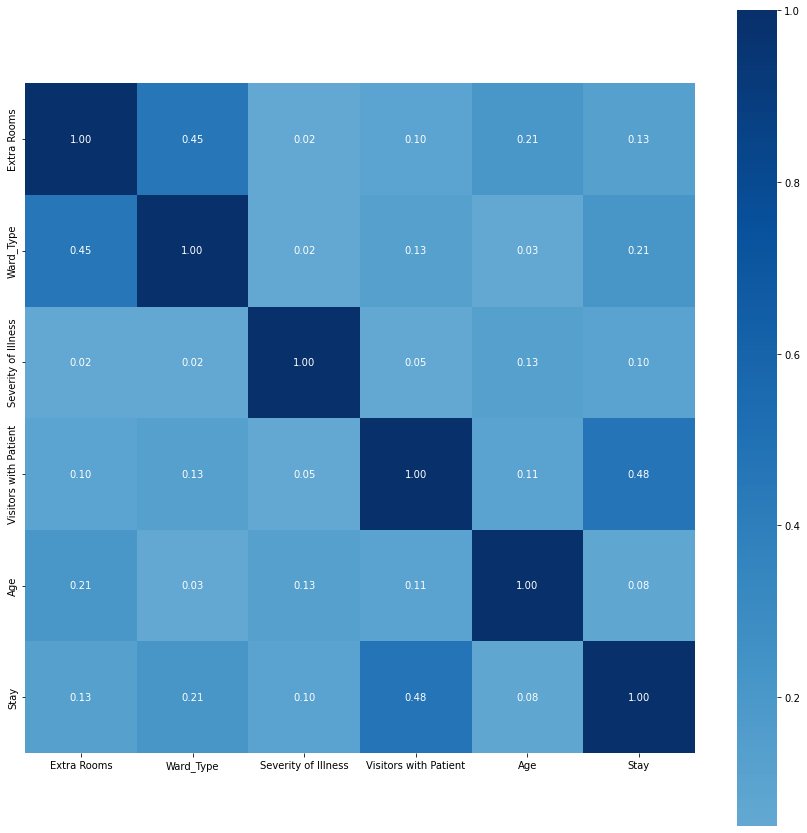

In [342]:
df_ass = df.drop(columns = ['Hospital_type_code', 'Department', 'Type of Admission', 'Admission_Deposit'])
df_ass = df_ass.rename(columns = {'Available Extra Rooms in Hospital': 'Extra Rooms'})
associations(df_ass, cmap = "Blues", vmin = 0.05, figsize = (15,15));

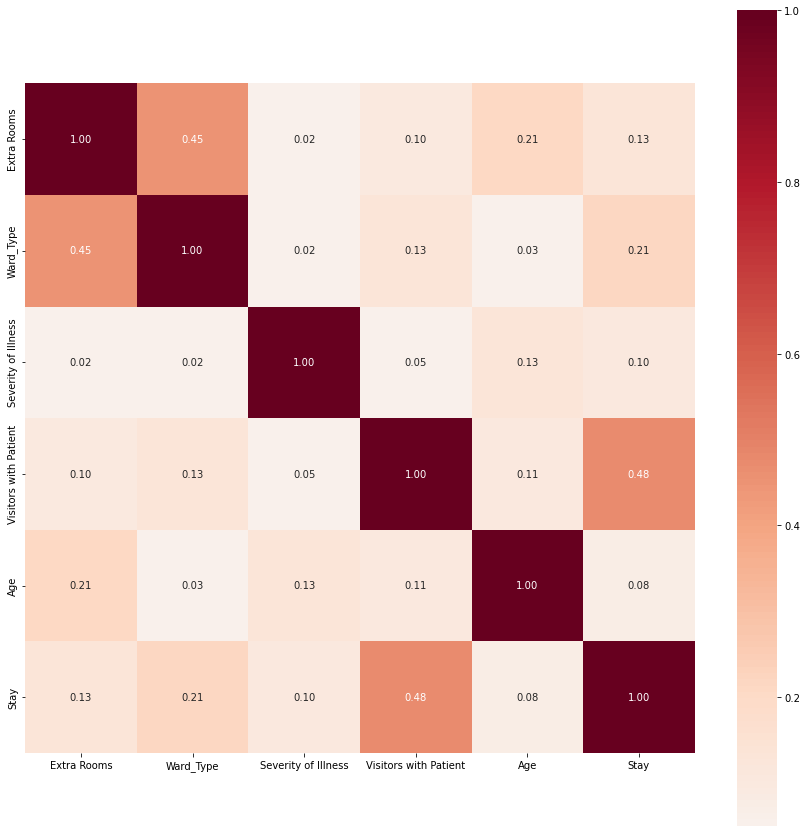

In [ ]:
associations(df_ass, vmin = 0.05, cmap = 'RdBu_r' , figsize = (15,15));